In [12]:
import numpy as np
import pandas as pd

In [13]:
excel_file = '../data/blog-gender-dataset.xlsx'

df = pd.read_excel(excel_file, usecols="A:B", header=None, names=['post', 'gender'], dtype={'post': str, 'gender': str})  
df

,post,gender
0,Long time no see. Like always I was rewriting...,M
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M
2,Who moved my Cheese??? The world has been de...,M
3,Yesterday I attended a biweekly meeting of an...,M
4,Liam is nothing like Natalie. Natalie never w...,F
...,...,...
3227,It was a scavenger style race with checkpoints...,M
3228,Finally! I got a full day's work done. Almost ...,F
3229,"At the height of laughter, the universe is flu...",M
3230,"I like birds, especially woodpeckers and MOST ...",M


In [14]:
print(df.gender.unique())

['M' 'F' nan ' M' ' F' 'F ' ' M ' 'm' 'f']


In [15]:
print(df['gender'].value_counts())

M      1547
F      1390
 F      153
 M      126
m         5
f         4
F         1
 M        1
Name: gender, dtype: int64


### Delete rows that contain NaN data 

In [16]:
print(df[df['post'].isna()])
indices = df[df['post'].isna()].index.sort_values(ascending=False)
for i in indices:
  df.drop(index=i, inplace=True)

print(df[df['post'].isna()])
df

     post gender
142   NaN    NaN
999   NaN    NaN
1010  NaN    NaN
1024  NaN    NaN
1471  NaN    NaN
1521  NaN      M
Empty DataFrame
Columns: [post, gender]
Index: []


,post,gender
0,Long time no see. Like always I was rewriting...,M
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M
2,Who moved my Cheese??? The world has been de...,M
3,Yesterday I attended a biweekly meeting of an...,M
4,Liam is nothing like Natalie. Natalie never w...,F
...,...,...
3227,It was a scavenger style race with checkpoints...,M
3228,Finally! I got a full day's work done. Almost ...,F
3229,"At the height of laughter, the universe is flu...",M
3230,"I like birds, especially woodpeckers and MOST ...",M


### Next standardize gender labels to 0 for male and 1 for female

In [17]:
for i in range(len(df)):
  if 'm' in df.iloc[i].gender.lower():
    df.iloc[i].gender = 0
  elif 'f' in df.iloc[i].gender.lower():
    df.iloc[i].gender = 1

In [18]:
print(df.gender.unique())

[0 1]


### Check language of the posts -> we only want English texts

In [19]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

nlp = spacy.load('en_core_web_sm')

def get_lang_detector(nlp, name):
    return LanguageDetector()

Language.factory('language_detector', func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

In [20]:
indices = []
language = []
for i in range(len(df.post)):
    doc = nlp(df.iloc[i].post)
    detected_language = doc._.language
    if not detected_language['language'] == 'en':
        indices.append(i)
        language.append(detected_language)
    if detected_language['language'] == 'en' and detected_language['score'] < 0.9:
        indices.append(i)
        language.append(detected_language)
        
print(indices)

[997, 1018, 1244, 1299, 1444, 2698, 2761]


In [21]:
for count, idx in enumerate(indices):
    print(language[count])
    print(df.iloc[idx].post)
    print("")

{'language': 'el', 'score': 0.85714159497372}
тнσѕє ωнσ ραѕѕιση мυѕι¢ ¢αηησт ℓινє ωιтнσυт ιт.. мυѕι¢ ιѕ α ∂яυg, αη α∂∂ι¢тιση. тσ ѕσмє мυѕι¢ мαу נυѕт вє тнє вєѕт ρσѕѕιвℓє ѕσℓυтιση ƒяσм яєℓιєνιηg тєηѕιση, ѕтяєѕѕ αη∂ σтнєя ∂ιƒƒι¢υℓтιєѕ ιη ℓιƒє - яαтнєя α ѕιмρℓє ωαу σƒ яєℓαχαтιση σƒ мιη∂, вσ∂у αη∂ ѕσυℓ. σтнєяѕ мαу ѕσℓєℓу ƒιη∂ ιт ƒσя єηтєятαιηмєηт ρυяρσѕєѕ. нαя∂ яσ¢к мυѕι¢ тσ кєєρ тнєм αℓινє αη∂ ιη нуρєя α¢тινє мσσ∂. 

{'language': 'fr', 'score': 0.9999962341851854}
best friend ,,
simple ,quiet ,smart,jovial,etc.....................................................
just complete in saying him"mr.computer"................................................... 

{'language': 'id', 'score': 0.9999976608180978}
 Ada apa dengan pelayar web Opera 10.50? Hmm.. Opera kini muncul dengan versi stabil dan memperkenalkan beberapa fungsi yang baru. Antara fungsi yang baru pada pelayar web ini adalah sokongan HTML5 dan CSS3. Opera 10.50 dikatakan sebagai pelayar web terpantas di dunia pada masa kini kerana m

Delete the samples that were detected as not English

In [22]:
for i in indices:
    df.drop(index=i, inplace=True)

### Check if data distribution between male and female is equal

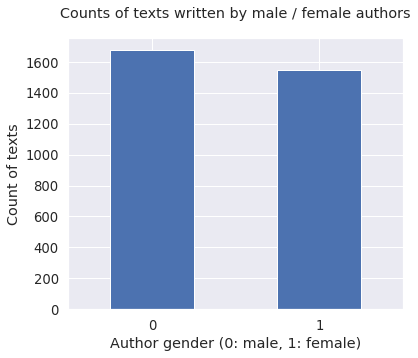

0    1673
1    1546
Name: gender, dtype: int64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2)
df['gender'].value_counts().plot(kind='bar', rot=0, figsize=(6,5))
plt.xlabel("Author gender (0: male, 1: female)")
plt.ylabel("Count of texts")
plt.title("Counts of texts written by male / female authors", y=1.05)
plt.show()

print(df['gender'].value_counts())

Check distribution of post length

In [24]:
post_lengths = df['post'].str.split().str.len()

print("Minimum post length: " + str(min(post_lengths)))
print("Maximum post length: " + str(max(post_lengths)))
print("Average post length: " + str(np.mean(post_lengths)))
print("Median:              " + str(np.median(post_lengths)))

Minimum post length: 11
Maximum post length: 6148
Average post length: 420.0959925442684
Median:              194.0


In [25]:
# most frequent post length
counts = np.bincount(post_lengths)
print("Most frequent post length: " + str(np.argmax(counts)))

Most frequent post length: 90


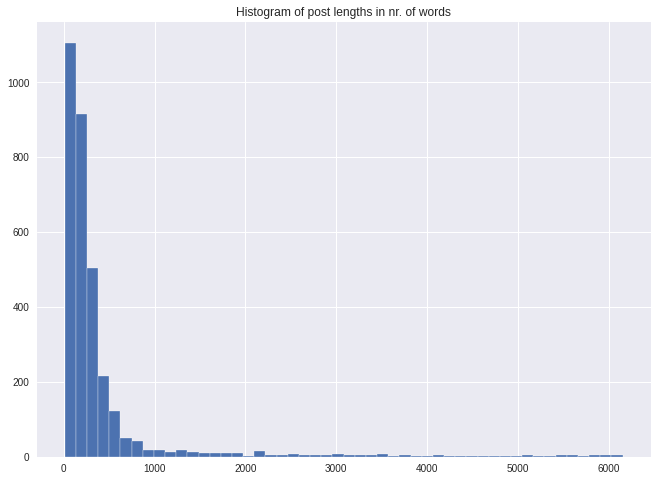

In [26]:
plt.figure(figsize=(11,8))
plt.style.use('seaborn')
plt.hist(post_lengths, bins=50)
plt.title("Histogram of post lengths in nr. of words")
plt.show()

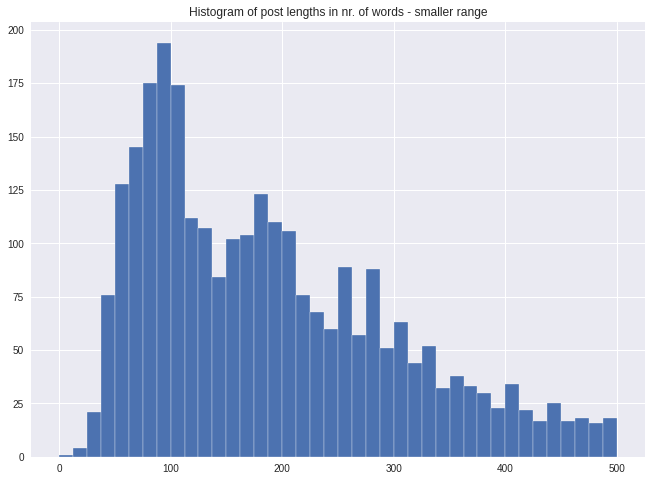

In [27]:
plt.figure(figsize=(11,8))
plt.style.use('seaborn')
plt.hist(post_lengths, bins=40, range=[0, 500])
plt.title("Histogram of post lengths in nr. of words - smaller range")
plt.show()

## Clean up and tokenize the data

In [28]:
import nltk
import string
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/lisa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lisa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/lisa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/lisa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
# tag map for POS tag (needed for lemmatization)
tag_map = defaultdict(lambda : wordnet.NOUN)
tag_map['J'] = wordnet.ADJ
tag_map['V'] = wordnet.VERB
tag_map['R'] = wordnet.ADV

def preprocess(text):
    
    # transform to lower-case and remove punctuation
    text_p = "".join([char for char in text.lower() if char not in string.punctuation])
    
    # transform to lower-case but keep punctuation -> maybe punctuation differs between men and women?
    #text_p = text.lower()

    # split tokens
    words = word_tokenize(text_p)
    
    # remove common english stopwords
    stop_words = stopwords.words('english')
    filtered_words = [word for word in words if word not in stop_words]

    # lemmatization (convert each token to its base form)
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    for token, tag in pos_tag(filtered_words):
      lemma = lemmatizer.lemmatize(token, tag_map[tag[0]])
      lemmatized.append(lemma)
    
    return lemmatized

In [31]:
preprocess("After my lunch break, I need to finish my programming assignment.")

['lunch', 'break', 'need', 'finish', 'programming', 'assignment']

In [21]:
print(df['post'][0])
print(preprocess(df['post'][0]))

 Long time no see. Like always I was rewriting it from scratch a couple of times. But nevertheless it's still java and now it uses metropolis sampling to help that poor path tracing converge.

Btw. I did MLT on yesterday evening after 2 beers (it had to be Ballmer peak).

Altough the implementation is still very fresh it easily outperforms standard path tracing, what is to be seen especially when difficult caustics are involved.

I've implemented spectral rendering too, it was very easy actually, cause all computations on wavelengths are linear just like rgb. But then I realised that even if it does feel more physically correct to do so, whats the point? 3d applications are operating in rgb color space, and because I cant represent a rgb color as spectrum interchangeably I have to approximate it, so as long as I'm not running a physical simulation or something I don't see the benefits (please correct me if I'm wrong), thus I abandoned that.
['long', 'time', 'see', 'like', 'always', 're

In [22]:
df

,post,gender
0,Long time no see. Like always I was rewriting...,0
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,0
2,Who moved my Cheese??? The world has been de...,0
3,Yesterday I attended a biweekly meeting of an...,0
4,Liam is nothing like Natalie. Natalie never w...,1
...,...,...
3227,It was a scavenger style race with checkpoints...,0
3228,Finally! I got a full day's work done. Almost ...,1
3229,"At the height of laughter, the universe is flu...",0
3230,"I like birds, especially woodpeckers and MOST ...",0


In [23]:
tokenized = []
for post in df['post']:
  tokenized.append(preprocess(post))

In [26]:
print(df['post'][0])
print(tokenized[0])

print("")

print(df['post'][100])
print(tokenized[100])

 Long time no see. Like always I was rewriting it from scratch a couple of times. But nevertheless it's still java and now it uses metropolis sampling to help that poor path tracing converge.

Btw. I did MLT on yesterday evening after 2 beers (it had to be Ballmer peak).

Altough the implementation is still very fresh it easily outperforms standard path tracing, what is to be seen especially when difficult caustics are involved.

I've implemented spectral rendering too, it was very easy actually, cause all computations on wavelengths are linear just like rgb. But then I realised that even if it does feel more physically correct to do so, whats the point? 3d applications are operating in rgb color space, and because I cant represent a rgb color as spectrum interchangeably I have to approximate it, so as long as I'm not running a physical simulation or something I don't see the benefits (please correct me if I'm wrong), thus I abandoned that.
['long', 'time', 'see', 'like', 'always', 're

In [27]:
df['tokenized'] = tokenized
df

,post,gender,tokenized
0,Long time no see. Like always I was rewriting...,0,"[long, time, see, like, always, rewrite, scrat..."
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,0,"[guest, demo, eric, iverson, ’, itty, bitty, s..."
2,Who moved my Cheese??? The world has been de...,0,"[move, cheese, world, develop, area, create, d..."
3,Yesterday I attended a biweekly meeting of an...,0,"[yesterday, attend, biweekly, meeting, informa..."
4,Liam is nothing like Natalie. Natalie never w...,1,"[liam, nothing, like, natalie, natalie, never,..."
...,...,...,...
3227,It was a scavenger style race with checkpoints...,0,"[scavenger, style, race, checkpoint, throughou..."
3228,Finally! I got a full day's work done. Almost ...,1,"[finally, get, full, day, work, do, almost, 4k..."
3229,"At the height of laughter, the universe is flu...",0,"[height, laughter, universe, flung, kaleidosco..."
3230,"I like birds, especially woodpeckers and MOST ...",0,"[like, bird, especially, woodpecker, especiall..."


In [79]:
from operator import index

df.to_csv('../data/tokenized.csv', index=False)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

def dummy(doc):
    return doc

vec = TfidfVectorizer(tokenizer=dummy, preprocessor=dummy)
posts = vec.fit_transform(df['tokenized'])

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init=5).fit(posts)

<AxesSubplot:xlabel='0'>

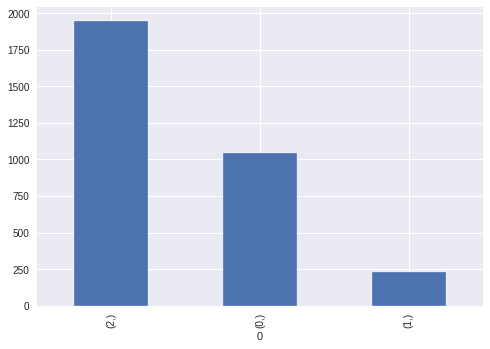

In [37]:
import numpy as np
import matplotlib.pyplot as plt

pd.DataFrame(kmeans.labels_).value_counts().plot(kind='bar')

In [50]:
def top_terms(k, n):
  kmeans = KMeans(n_clusters=k, random_state=0, n_init=5).fit(posts)

  indxes = np.argsort(kmeans.cluster_centers_, axis=1)[:, -n:]

  inv_vocab = {v: k for k, v in vec.vocabulary_.items()}

  i=0
  for idx in indxes:
    print('Top terms of cluster', i, [inv_vocab[j] for j in idx])
    i+=1

In [51]:
# 5 clusters, top 10 terms
top_terms(5, 10) 

Top terms of cluster 0 ['–', 'say', 'time', 'like', 'one', 'get', 'make', '”', '“', '’']
Top terms of cluster 1 ['would', 'new', 'take', 'year', 'like', 'time', 'make', 'go', 'get', 'one']
Top terms of cluster 2 ['make', 'one', 'think', 'know', 'like', 'day', 'time', 'go', 'get', 'im']
Top terms of cluster 3 ['time', 'like', 'person', 'one', 'u', 'love', 'know', 'friend', 'god', 'life']
Top terms of cluster 4 ['tat', 'always', 'gud', '2', 'guy', 'r', 'ur', 'abt', 'u', 'n']


In [52]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
  doc = nlp(text,  disable=["parser", "ner"])
  result = []

  for token in doc:
    if not token.is_stop and token.is_alpha and len(token)>=3:
      result.append(token.lemma_)

  return result

In [53]:
nested = []

for doc in df.post:
  nested.append(preprocess(doc))

In [58]:
print(nested[0][:])
print("")
print(df['post'][0])

['long', 'time', 'like', 'rewrite', 'scratch', 'couple', 'time', 'java', 'use', 'metropolis', 'sample', 'help', 'poor', 'path', 'trace', 'converge', 'btw', 'MLT', 'yesterday', 'evening', 'beer', 'Ballmer', 'peak', 'Altough', 'implementation', 'fresh', 'easily', 'outperform', 'standard', 'path', 'trace', 'see', 'especially', 'difficult', 'caustic', 'involve', 'implement', 'spectral', 'rendering', 'easy', 'actually', 'cause', 'computation', 'wavelength', 'linear', 'like', 'rgb', 'realise', 'feel', 'physically', 'correct', 'point', 'application', 'operate', 'rgb', 'color', 'space', 'represent', 'rgb', 'color', 'spectrum', 'interchangeably', 'approximate', 'long', 'run', 'physical', 'simulation', 'benefit', 'correct', 'wrong', 'abandon']

 Long time no see. Like always I was rewriting it from scratch a couple of times. But nevertheless it's still java and now it uses metropolis sampling to help that poor path tracing converge.

Btw. I did MLT on yesterday evening after 2 beers (it had to b

In [66]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(nested)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

In [67]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in nested]

In [68]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 3159
Number of documents: 3218


In [73]:
import logging
import re

logging.basicConfig(filename='gensim.log', format='%(asctime)s:%(levelname)s:%(message)s', level=logging.INFO)

def parse_logfile():
    matcher = re.compile('(-*\d+\.\d+) per-word .* (\d+\.\d+) perplexity')
    likelihoods = []
    with open('gensim.log') as source:
        for line in source:
            match = matcher.search(line)
            if match:
                likelihoods.append(float(match.group(1)))
    return likelihoods

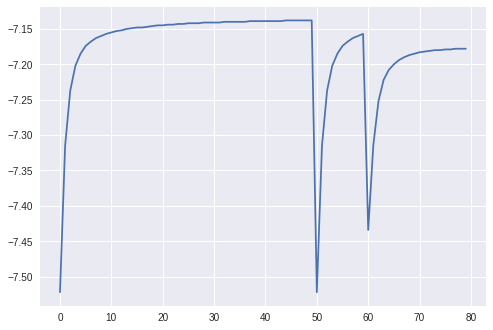

In [78]:
# Set training parameters.
num_topics = 5
passes = 20

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    alpha='auto',
    eta='auto',
    num_topics=num_topics,
    passes=passes,
    random_state=1
)

likelihoods = parse_logfile()
plt.plot(list(range(len(likelihoods))), likelihoods)

In [76]:
# TODO: Enter code here to train an LDA model and store it in a variable `model`
from gensim.models import LdaModel

# Set training parameters.
num_topics = 5
passes = 10

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    alpha='auto',
    eta='auto',
    num_topics=num_topics,
    passes=passes,
    random_state=1
)

model.print_topics()

## Split into training and test data

In [22]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['gender'], random_state=0)
df_train

,post,gender,tokenized
2851,"Again, Lights Out San Francisco was a huge su...",0,"[light, san, francisco, huge, success, thanks,..."
2172,"The end for a new beginning - Date: Dec 8, 200...",1,"[end, new, begin, date, dec, 8, 2009, location..."
1780,Real school starts on Wednesday. I am excited ...,1,"[real, school, start, wednesday, excite, nervo..."
2906,so now that i got you going about that hot tea...,0,"[get, go, hot, teacher, hots, kick, hotness, f..."
1182,"""bodhai""-(I shall not dwell into the details o...",0,"[bodhaii, shall, dwell, detail, name, come, ri..."
...,...,...,...
2570,"Mrs. Clinton, I work in health care and see ma...",1,"[mr, clinton, work, health, care, see, many, p..."
1288,"Obesity: The killer combination of salt, fat ...",0,"[obesity, killer, combination, salt, fat, suga..."
1536,If there was anything more terrible than Rena ...,1,"[anything, terrible, rena, riffel, ’, attempt,..."
1419,Painted this one at Dale Hollow Lake State Res...,0,"[paint, one, dale, hollow, lake, state, resort..."


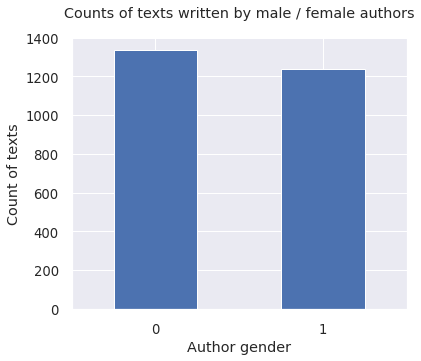

0    1336
1    1236
Name: gender, dtype: int64


In [23]:
sns.set(font_scale=1.2)
df_train['gender'].value_counts().plot(kind='bar', rot=0, figsize=(6,5))
plt.xlabel("Author gender")
plt.ylabel("Count of texts")
plt.title("Counts of texts written by male / female authors", y=1.05)
plt.show()

print(df_train['gender'].value_counts())

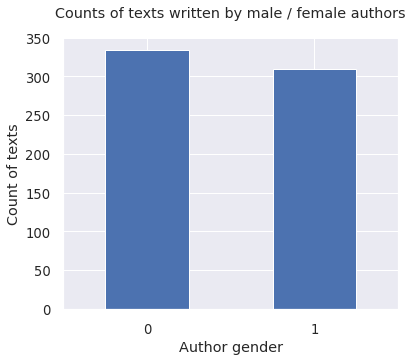

0    334
1    310
Name: gender, dtype: int64


In [24]:
sns.set(font_scale=1.2)
df_test['gender'].value_counts().plot(kind='bar', rot=0, figsize=(6,5))
plt.xlabel("Author gender")
plt.ylabel("Count of texts")
plt.title("Counts of texts written by male / female authors", y=1.05)
plt.show()

print(df_test['gender'].value_counts())

Save to csv

In [25]:
from operator import index

df_train.to_csv('../data/train_tokenized.csv', index=False)
df_test.to_csv('../data/test_tokenized.csv', index=False)